Перед вами набор данных для прогнозирования поступления абитуриентов в колледж. целевая переменная набора - in_college.

Осмотрите данные. Какая задача перед вами (классификация/регрессия)? Отберите существенные на ваш взгляд признаки. Решите задачу методом опорных векторов в качестве метрики используйте accuracy_score. Найдите оптимальные параметры для вашей модели. Оцените оптимальное решение.

У нас в данном примере - классификация,так как мы отталкиваемся от нашей целевой переменной  in_college. В прошлом уроке у нас были
цены на недвижимость,что является непрервыной величиной,следовательно это регрессия.

In [166]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, \
              recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, \
              auc, mean_squared_error
import math

In [167]:
df = pd.read_csv('data.csv')

In [168]:
df

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False
...,...,...,...,...,...,...,...,...,...,...,...
995,Vocational,A,Female,Very Interested,Rural,49,7420000,63.6,85.99,True,True
996,Academic,B,Female,Less Interested,Rural,51,7480000,84.3,89.72,True,True
997,Vocational,A,Male,Less Interested,Urban,49,5550000,75.2,79.56,False,True
998,Academic,B,Male,Uncertain,Rural,53,5840000,105.8,87.18,True,True


In [169]:
df.shape

(1000, 11)

In [170]:
df.columns

Index(['type_school', 'school_accreditation', 'gender', 'interest',
       'residence', 'parent_age', 'parent_salary', 'house_area',
       'average_grades', 'parent_was_in_college', 'in_college'],
      dtype='object')

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   type_school            1000 non-null   object 
 1   school_accreditation   1000 non-null   object 
 2   gender                 1000 non-null   object 
 3   interest               1000 non-null   object 
 4   residence              1000 non-null   object 
 5   parent_age             1000 non-null   int64  
 6   parent_salary          1000 non-null   int64  
 7   house_area             1000 non-null   float64
 8   average_grades         1000 non-null   float64
 9   parent_was_in_college  1000 non-null   bool   
 10  in_college             1000 non-null   bool   
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 72.4+ KB


array([[<AxesSubplot:title={'center':'parent_age'}>,
        <AxesSubplot:title={'center':'parent_salary'}>],
       [<AxesSubplot:title={'center':'house_area'}>,
        <AxesSubplot:title={'center':'average_grades'}>]], dtype=object)

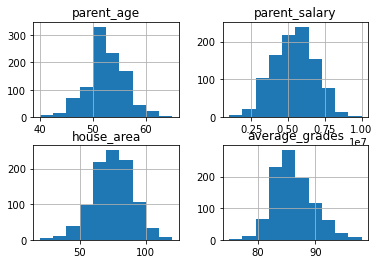

In [172]:
df.hist()

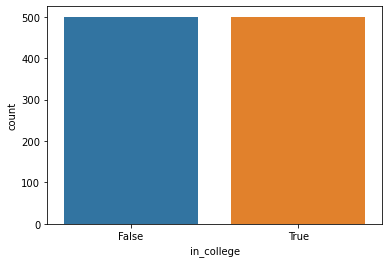

In [270]:
sns.countplot(x = df['in_college']);

Text(0, 0.5, 'parent_salary')

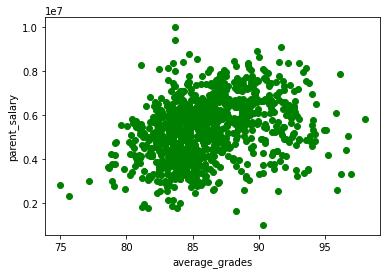

In [275]:
plt.scatter(df['average_grades'], df['parent_salary'], color = 'green')
plt.xlabel('average_grades')
plt.ylabel('parent_salary')

In [174]:
#pd.crosstab(df['in_college'],df['average_grades'])

In [175]:
df['type_school'].value_counts()

Academic      609
Vocational    391
Name: type_school, dtype: int64

In [176]:
df['school_accreditation'].value_counts()

B    519
A    481
Name: school_accreditation, dtype: int64

In [177]:
df['gender'].value_counts()

Male      515
Female    485
Name: gender, dtype: int64

In [178]:
df['interest'].value_counts()

Very Interested     324
Uncertain           261
Less Interested     229
Quiet Interested    100
Not Interested       86
Name: interest, dtype: int64

In [179]:
df['residence'].value_counts()

Urban    539
Rural    461
Name: residence, dtype: int64

In [180]:
# where we have object we replace it with numbers:
# df=pd.get_dumnies(df,columns['type_school'])
# OR:
df['type_school'] = df['type_school'].map({'Academic':0, 'Vocational':1})
df['school_accreditation'] = df['school_accreditation'].map({'A':0, 'B':1})
df['gender'] = df['gender'].map({'Male':0, 'Female':1})
df['residence'] = df['residence'].map({'Urban':0, 'Rural':1})
df['interest'] = df['interest'].map({'Very Interested':0, 'Uncertain':1,'Less Interested':2,'Quiet Interested':3,'Not Interested':4})

In [181]:
df

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
0,0,0,0,2,0,56,6950000,83.0,84.09,False,True
1,0,0,0,2,0,57,4410000,76.8,86.91,False,True
2,0,1,1,0,0,50,6500000,80.6,87.43,False,True
3,1,1,0,0,1,49,6600000,78.2,82.12,True,True
4,0,0,1,0,0,57,5250000,75.1,86.79,False,False
...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,1,0,1,49,7420000,63.6,85.99,True,True
996,0,1,1,2,1,51,7480000,84.3,89.72,True,True
997,1,0,0,2,0,49,5550000,75.2,79.56,False,True
998,0,1,0,1,1,53,5840000,105.8,87.18,True,True


<AxesSubplot:>

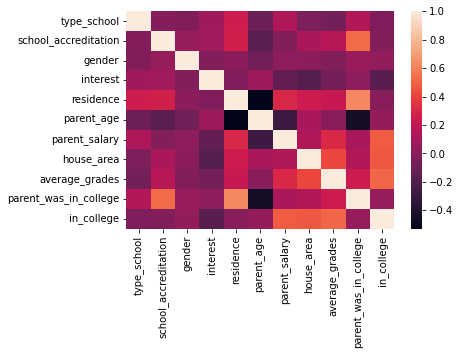

In [276]:
sns.heatmap(df.corr())

после корреляции на графике выше можно сделать вывод, что parent_age , interest и parent_was_in_college имеют нулевую(отрицательную) корреляцию
поэтому далее данные столбики будут удалены для построения модели.

In [284]:
X = df.drop(['parent_was_in_college','parent_age','in_college','interest'], axis = 1)
Y = df['in_college']

In [285]:
#X
Y

0       True
1       True
2       True
3       True
4      False
       ...  
995     True
996     True
997     True
998     True
999    False
Name: in_college, Length: 1000, dtype: bool

In [286]:
# Нужно создать данные для обучения и данные для проверки
from sklearn.model_selection import train_test_split
# импортируем функцию train_test_split и передаем массив независимых переменных : X и массив меток: Y 
# и она по одинаковым индексам разбивает каждый массив на 2:на обучение (X_train,Y_train) и тестирование (X_test,Y_test ),
# Создаем соотношение в котором нам надо побить все (test_size = 0.25)- в данном случает в тестовое множество попадет 20% всего количества
#  random_state инициализирует генерацию случайных чисел

X_train, X_test, Y_train, Y_test =  train_test_split(X, Y, test_size = 0.2, random_state = 42)

PIPELINE

In [287]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC


In [304]:
# в одном списке передаем два кортежа('scaler' и 'svc',где SVC это классификатор- с полимеальным ядром,степень ядра 3 и C)
pipe_svc = Pipeline ([('scaler', StandardScaler() ), 
                    ('svc', SVC(kernel = 'poly', degree =3, C = 4))])

In [305]:
pipe_svc.fit(X_train,Y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(C=4, kernel='poly'))])

In [294]:
#первоначальный результат, degree =3, C = 10
pipe_svc.score(X_test,Y_test)

0.88

In [306]:
# результат после смены параметров
pipe_svc.score(X_test,Y_test)

0.885

SVM

In [307]:
# Нужно создать данные для обучения и данные для проверки
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =  train_test_split(X, Y, test_size = 0.2, random_state = 42)

sc = StandardScaler()  # метод чувствителен к масштабированию
svm_c = LinearSVC(random_state=0)

X_train = sc.fit_transform (X_train)
svm_c.fit(X_train,Y_train)

LinearSVC(random_state=0)

In [308]:
#svm_c.predict(X_test)

In [309]:
svm_c.score(X_train,Y_train)

0.8425

In [234]:
prediction = svm_c.predict(X_test)

In [235]:
roc_auc_score(Y_test, prediction), accuracy_score(Y_test, prediction)

(0.5, 0.47)

In [236]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()

In [237]:
sc = StandardScaler()

In [238]:
sc.fit(X_train)

StandardScaler()

In [239]:
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [240]:
knn_clf.fit(X_train,Y_train)

KNeighborsClassifier()

In [241]:
knn_clf.score(X_train,Y_train),knn_clf.score(X_test,Y_test)

(0.90625, 0.47)

Cross - Validation

In [242]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict

In [243]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =  train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [244]:
clf = DecisionTreeClassifier(max_depth=4, min_samples_split=4, min_samples_leaf=4, random_state = 42)

In [245]:
clf.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=4, min_samples_split=4,
                       random_state=42)

In [246]:
clf.score(X_test,Y_test)

0.845

In [247]:
#передаем наш классификатор обученный, и наше множество,на котором учим.cv - то сколько разбиений мы хотим делать
# scoring='roc_auc'
score = cross_val_score(clf,X_train,Y_train,cv=5,scoring='roc_auc')

In [248]:
# получили 5 оценок из множества X, Y
score

array([0.82661353, 0.88881075, 0.8313799 , 0.87560556, 0.85358036])

In [249]:
score.mean()

0.855198022850076

In [250]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score

In [251]:
tree = DecisionTreeClassifier()
tree.fit(X, Y)


DecisionTreeClassifier()

In [310]:
#оцениваем точность
tree_pred = tree.predict(X_test)
roc_auc_score(Y_test, tree_pred), accuracy_score(Y_test, tree_pred)

ValueError: X has 7 features, but DecisionTreeClassifier is expecting 8 features as input.

In [253]:
# поиск для дерева
# формируем словарь
tree_params = {'max_depth': range(1,11), 'max_features': range(4,19)}

In [254]:
tree_grid = GridSearchCV(tree, tree_params,cv=5, verbose=True, )# scoring='roc_auc'

In [255]:
tree_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


C:\Users\laptop\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\laptop\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\laptop\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 903, in fit
    super().fit(
  File "C:\Users\laptop\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 289, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\laptop\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these para

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 11),
                         'max_features': range(4, 19)},
             verbose=True)

In [256]:
tree_grid.best_params_

{'max_depth': 6, 'max_features': 5}

In [257]:
tree_grid.best_score_

0.8325000000000001

In [258]:
pred = tree_grid.predict(X_test)

In [259]:
roc_auc_score(Y_test, pred), accuracy_score(Y_test, pred)

(0.8376154154957849, 0.84)

In [260]:
#ближайшие соседи
knn = KNeighborsClassifier()
knn.fit(X, Y)

KNeighborsClassifier()

In [261]:
knn_pred = knn.predict(X_test)
roc_auc_score (Y_test, knn_pred), accuracy_score (Y_test, knn_pred)
# accuracy_score - оцениваем точность попадания в класс
# roc_auc_score - оцениваем площать под кривой

(0.8181453231633882, 0.82)

In [262]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =  train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [263]:
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [264]:
knn_params= {'n_neighbors':range(1,11)}

In [265]:
knn_grid = GridSearchCV(knn, knn_params,cv=5, verbose=True, )

In [266]:
knn_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 11)}, verbose=True)

In [267]:
knn_grid.score(X_train,Y_train)

0.92875

In [268]:
pre = knn_grid.predict(X_test)

In [269]:
roc_auc_score(Y_test, pre), accuracy_score(Y_test, pre)

(0.8488558811722201, 0.85)